### Breast Cancer Calssification

In [8]:
# Importing the necessary libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Extracting the dataset: 
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [3]:
# Viewing the dataset: 
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

#### Preprocessing the raw dataset: 

In [4]:
# Forming the dataframe:
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df['Target'] = dataset['target']

In [5]:
# Viewing the dataframe: 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### EDA:

In [6]:
# Testing the shape of the dataset: 
df.shape

(569, 31)

In [7]:
# Checking if we have any nan or missing values: 
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64

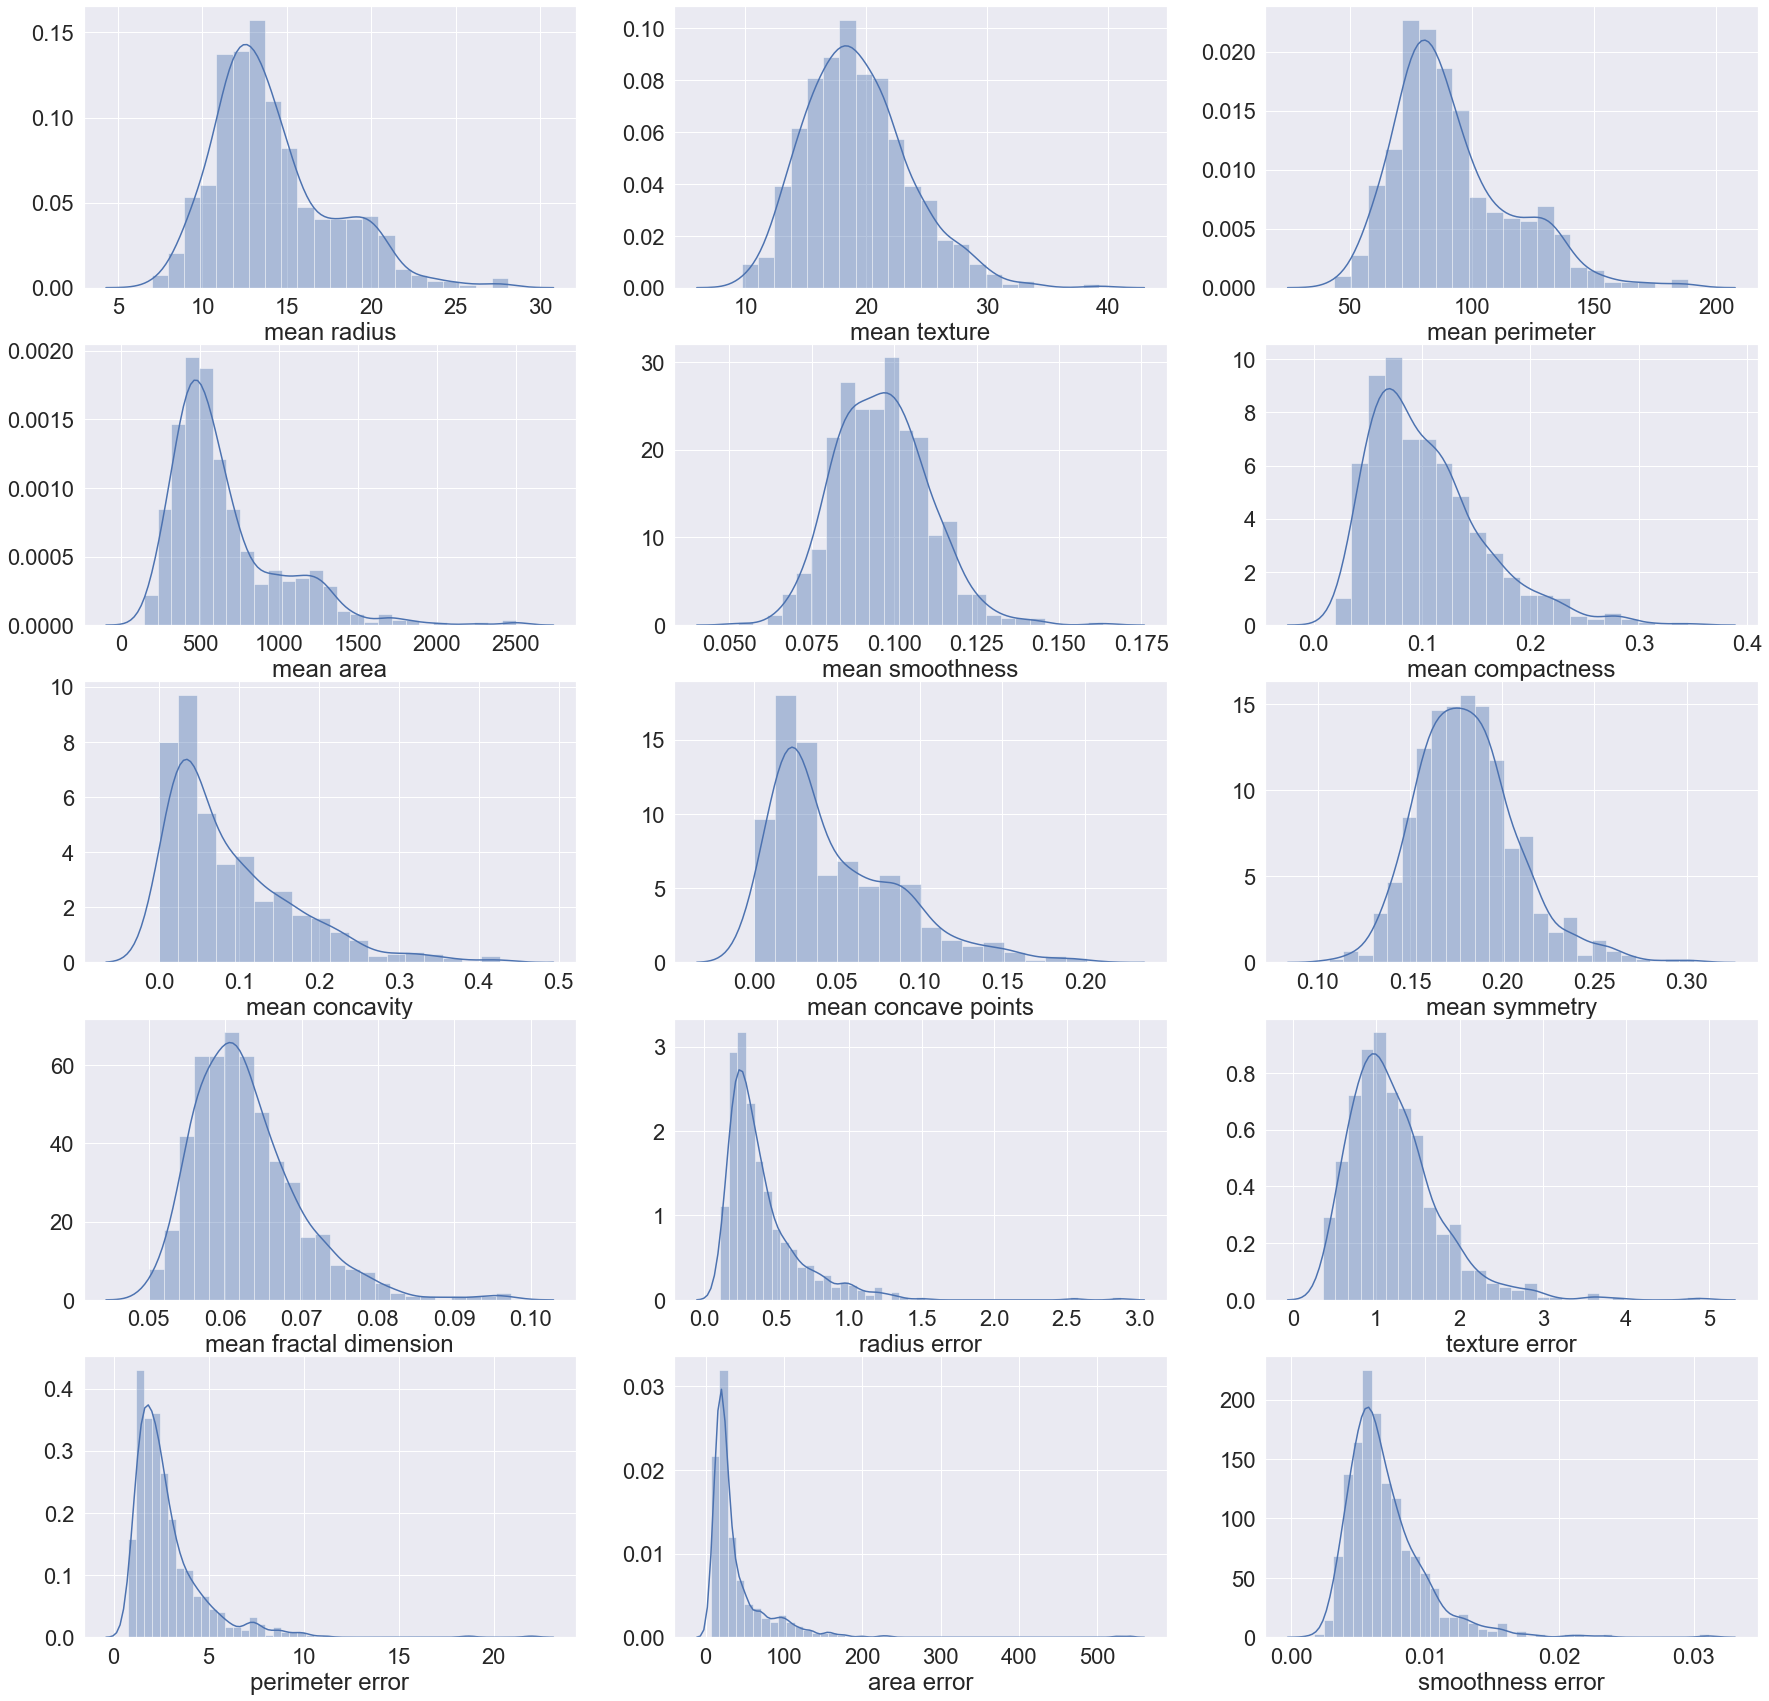

In [19]:
# Viewing the data distribution: 
sns.set(font_scale=2)
f, axes = plt.subplots(5,3, figsize = (30,30))
col = 0
for i in range(0, 5):
    for j in range(0,3):
        if col < 31:
            sns.distplot(df.iloc[:,col], ax = axes[i][j])
            col = col + 1
plt.show()

#### Plotting the correlations graph:

In [21]:
df_temp = df.copy()
df_temp = df_temp.drop(columns = ['Target'])
df_temp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


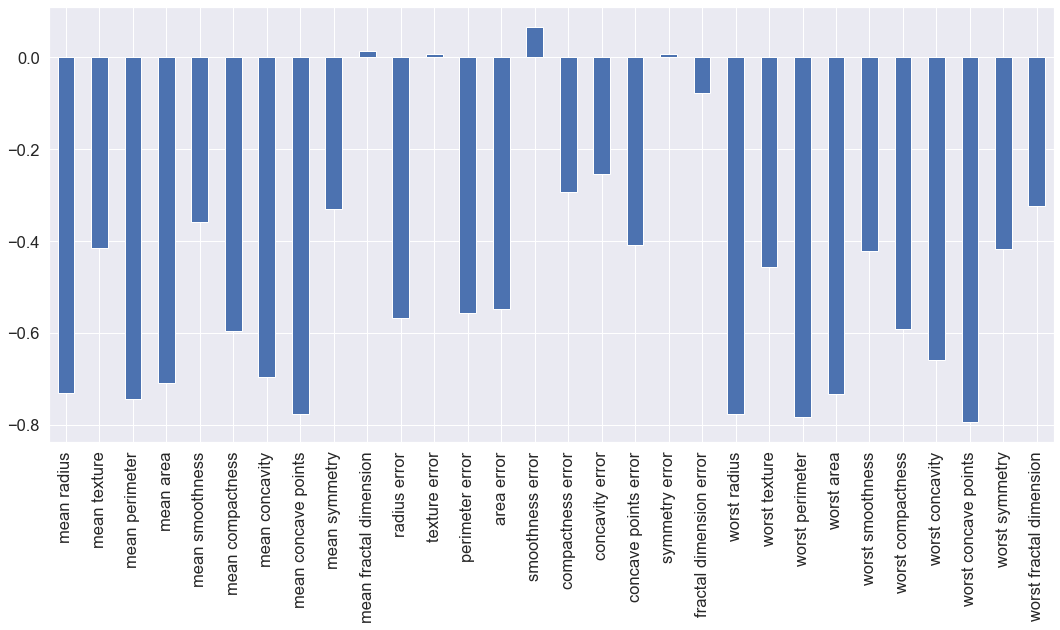

In [25]:
sns.set(font_scale=1.5)
plt.figure(figsize=(18,8))
df_temp.corrwith(df.Target).plot.bar()
plt.show()

#### The Correlation Matrix: 

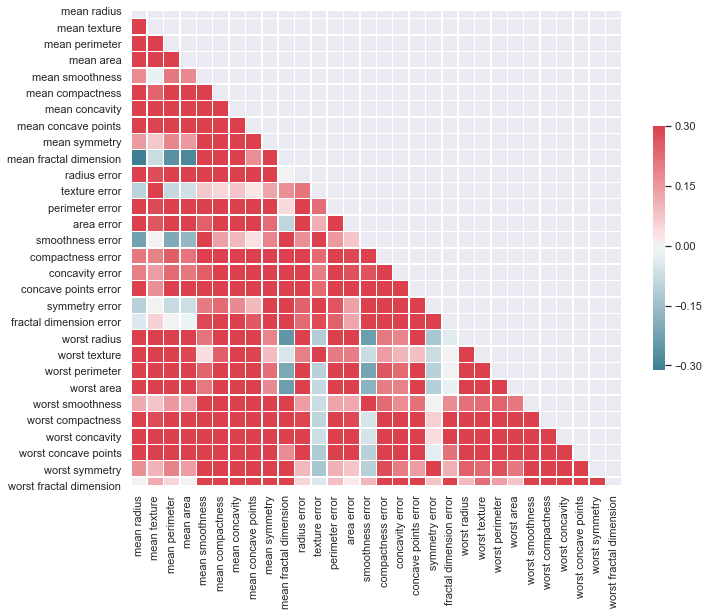

In [30]:
sns.set(font_scale=1)
# Compute the correlation matrix
corr = df_temp.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

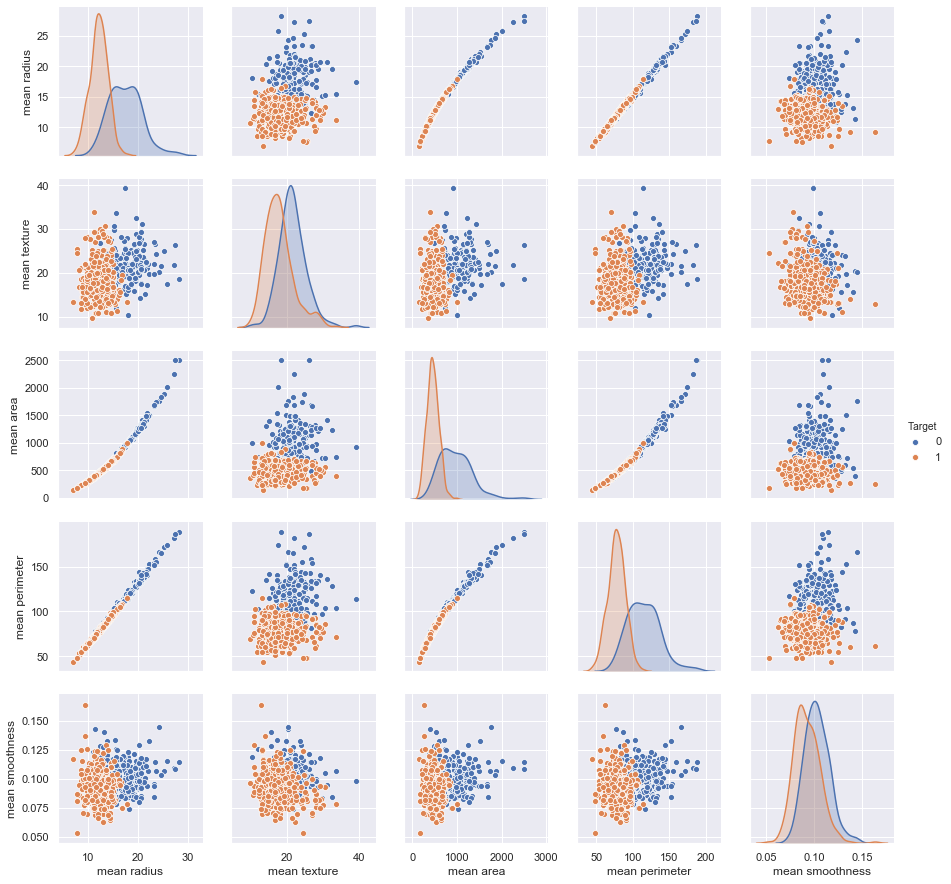

In [34]:
# Few more visualization : 
sns.pairplot(df, hue = 'Target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )

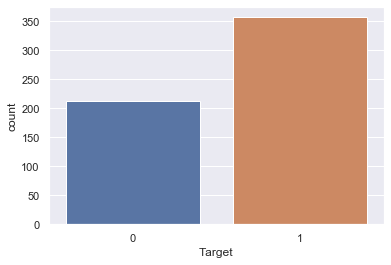

In [37]:
# Count plot on the target column: 
sns.countplot(df['Target'], label = 'Count')
plt.show()

#### Preprocessing the dataset: 

In [38]:
# Defining the variable x and y: 
x = df_temp.copy()
y = df.Target

In [40]:
# Seperating the training and the test dataset: 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [42]:
# Preprocessing the dataset: 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Building the classification model: 

In [47]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
# Making the predictions: 
nb_y_pred = nb_classifier.predict(x_test)

#### Validating the output: 

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
print('Correct Prediction:', np.sum(np.diagonal(nb_cm)))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(np.diagonal(nb_cm)))
print('Accuracy:', str(round(accuracy_score(y_test, nb_y_pred),4)*100)+'%')
print('Precision:', str(round(precision_score(y_test, nb_y_pred),4)*100)+'%')

[[40  3]
 [ 1 70]]
Correct Prediction: 110
Incorrect Prediction: 4
Accuracy: 96.49%
Precision: 95.89%


#### Building using SVM: 

In [57]:
from sklearn.svm import SVC
# Building the model 
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)

# Predicting the model
svc_y_pred = svc_classifier.predict(x_test)

# Validating the results:
svc_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
print('Correct Prediction:', np.sum(np.diagonal(svc_cm)))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(np.diagonal(svc_cm)))
print('Accuracy:', str(round(accuracy_score(y_test, svc_y_pred),4)*100)+'%')
print('Precision:', str(round(precision_score(y_test, svc_y_pred),4)*100)+'%')

[[40  3]
 [ 1 70]]
Correct Prediction: 110
Incorrect Prediction: 4
Accuracy: 98.25%
Precision: 97.26%


#### Improving the model: Using Grid Search

In [65]:
# Initializing the parameter list
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

# Importing the grid search module: 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid, refit = True)
grid.fit(x_train, y_train)

C:\Users\6107783\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [66]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [67]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
# Predicting using the grid: 
grid_prediction = grid.predict(x_test)

In [69]:
# Validating the results:
grid_cm = confusion_matrix(y_test, grid_prediction)
print(nb_cm)
print('Correct Prediction:', np.sum(np.diagonal(grid_cm)))
print('Incorrect Prediction:', x_test.shape[0] - np.sum(np.diagonal(grid_cm)))
print('Accuracy:', str(round(accuracy_score(y_test, grid_prediction),4)*100)+'%')
print('Precision:', str(round(precision_score(y_test, grid_prediction),4)*100)+'%')

[[40  3]
 [ 1 70]]
Correct Prediction: 112
Incorrect Prediction: 2
Accuracy: 98.25%
Precision: 97.26%
